# KDE Difference Plots

The purpose of this notebook is to reproduce figures presenting results from our interval statistics analysis using BChron age models. Here we show the application of interval statistic techniques to the difference between median interval values (as opposed to the median interval values themselves).

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pyleoclim as pyleo

from matplotlib import gridspec
from matplotlib.lines import Line2D

In [2]:
with open('../data/holo_chrons_study.pkl','rb') as handle:
    holo_chrons = pickle.load(handle)

with open('../data/pos_dict.pkl','rb') as handle:
    pos_dict = pickle.load(handle)

#Sort by latitude

lat_dict = {pos_dict[label]['lat']:label for label in holo_chrons.keys()}

sort_index = np.sort(np.array(list(lat_dict.keys())))[::-1]
sort_label = [lat_dict[lat] for lat in sort_index]
holo_chrons = {label:holo_chrons[label] for label in sort_label} #Sort by latitude
pos_dict = {label:pos_dict[label] for label in sort_label}

In [3]:
# detrending and collect d18O values at different intervals

#d18O values at different intervals
d18O_int={}
#Detrended zscore vals
zscore_detrend={}

for site in holo_chrons.keys():
    ty = holo_chrons[site]['d18O'].astype(float)
    chron_tmp = holo_chrons[site]['chron'].astype(float)
    nC = 1000

    zscore_detrend[site]=np.zeros((nC,len(ty)))
    zscore_detrend[site][:]=np.nan
    
    for j in range(nC):
        tx=chron_tmp[j,:]
        # detrending by the Pyleoclim detrending function
        ts = pyleo.Series(time=tx, value=ty,dropna=False)
        ts_detrended= ts.detrend(method='savitzky-golay')
        a=ts_detrended.value
        zscore_detrend[site][j,:] = zscore(a,nan_policy='omit')

    d18O_int[site]={}
    holo_int={}
    # int_size: interval size
    for int_size in [50,100,150,200,250,300]:
        holo_int[int_size] = np.arange(4000%int_size-int_size/2,10000,int_size)
        d18O_int[site][int_size]=np.zeros((len(holo_int[int_size])-1,nC))
        d18O_int[site][int_size][:]=np.nan
        #Iterating over intervals
        for idx,tage in enumerate(holo_int[int_size][:-1]):
            for j in range(nC):
                tx = chron_tmp[j,:]
                #Calculating median interval values for each ensemble member
                d18O_int[site][int_size][idx,j]=np.nanmedian(zscore_detrend[site][j,(tx>=tage) & (tx<holo_int[int_size][idx+1])])

/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_63613/736478890.py:19: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True, which might modify your supplied time metadata.  Please set to False if you want a different behavior.
  ts = pyleo.Series(time=tx, value=ty,dropna=False)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_63613/736478890.py:19: UserWarning: No time_unit parameter provided. Assuming years CE.
  ts = pyleo.Series(time=tx, value=ty,dropna=False)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_63613/736478890.py:19: UserWarning: No time_name parameter provided. Assuming "Time".
  ts = pyleo.Series(time=tx, value=ty,dropna=False)
/Users/alexjames/miniconda3/envs/asc_env/lib/python3.11/site-packages/pyleoclim/utils/tsutils.py:1400: UserWarning: Timeseries is not evenly-spaced, interpolating...
  warnings.warn("Timeseries is not evenly-spaced, interpolating...")
/Users/alexjames/miniconda3/envs/asc_e

Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis v

/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_63613/736478890.py:36: RuntimeWarning: All-NaN slice encountered
  d18O_int[site][int_size][idx,j]=np.nanmedian(zscore_detrend[site][j,(tx>=tage) & (tx<holo_int[int_size][idx+1])])
/Users/alexjames/miniconda3/envs/asc_env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis v

In [4]:
# Calculating the difference between median interval values

sig_all_diff={}
d18O_diff={}
for site in d18O_int:
    d18O_diff[site]={}
    for int_size in [50,100,150,200,250,300]:
        d18O_diff[site][int_size]=np.diff(d18O_int[site][int_size],axis=0)

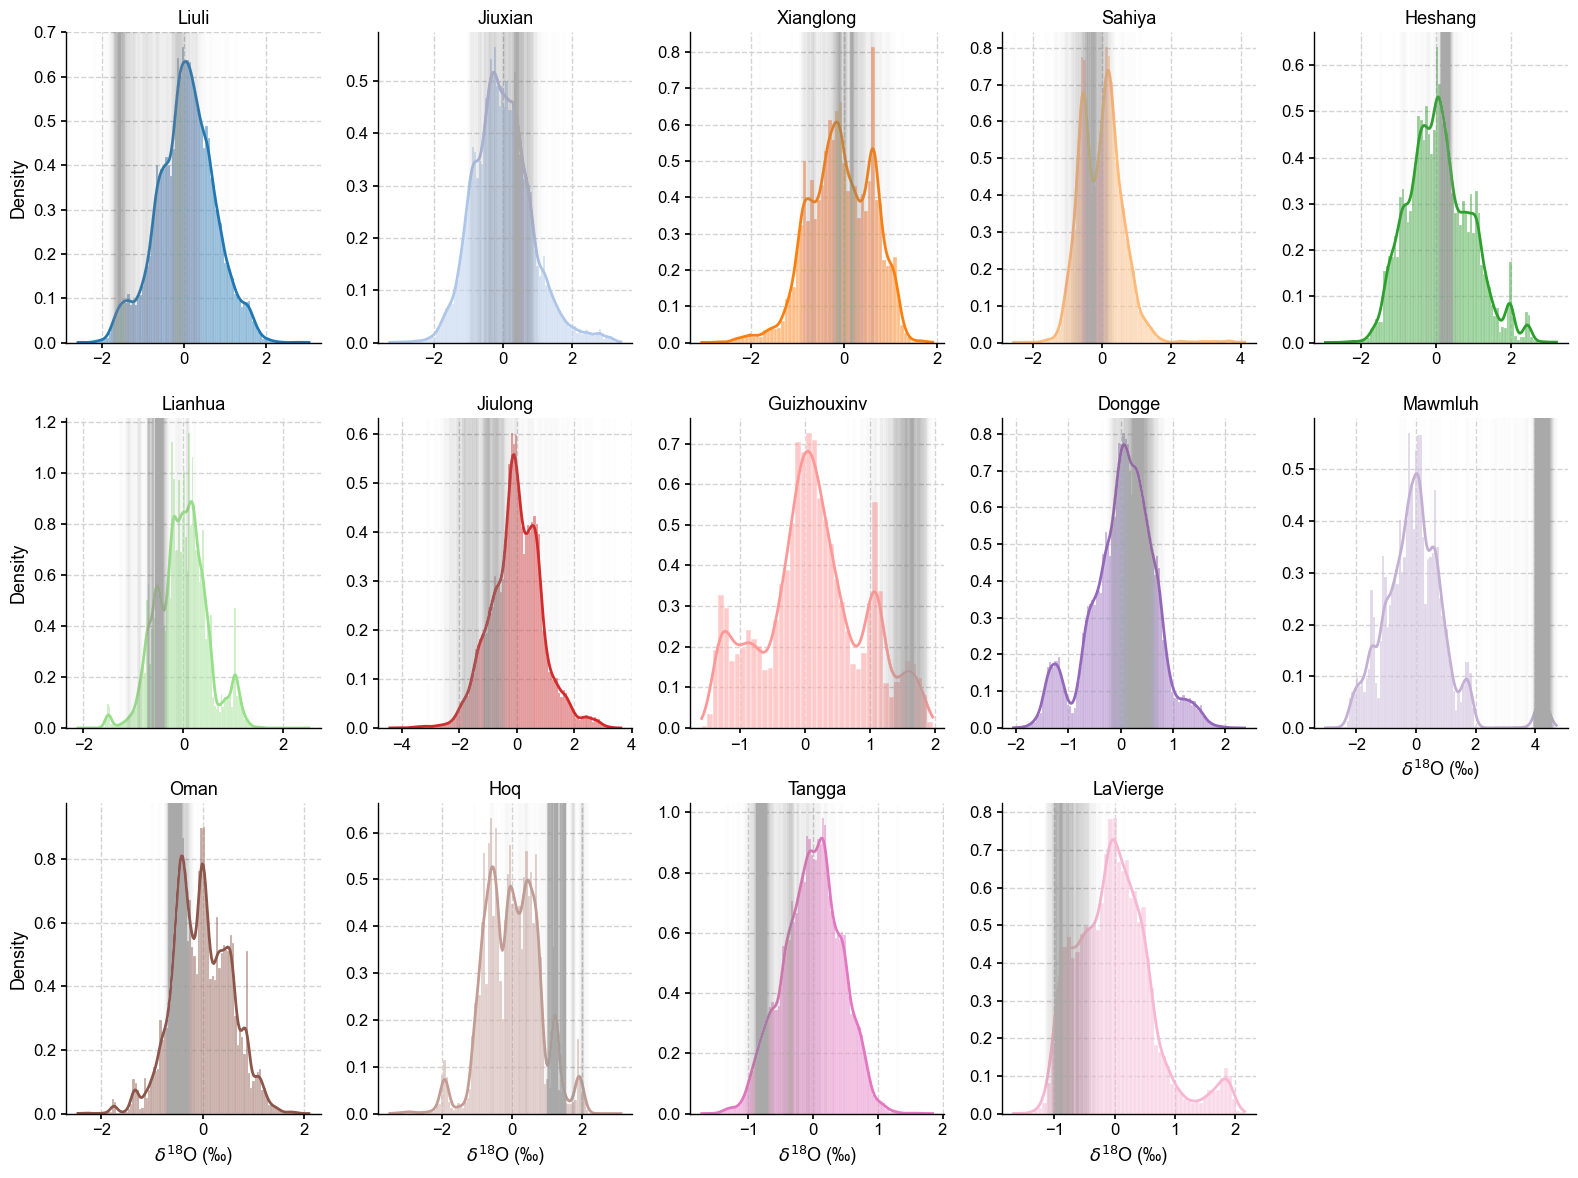

In [5]:
# Plotting

# Set color palette based on the number of keys in holo_chrons
clrs = sns.color_palette(palette='tab20', n_colors=len(holo_chrons.keys()) + 1)

# Create a figure with 5 columns and 3 rows of subplots
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(16, 12), tight_layout=True)

# Flatten the 2D array of axes into a 1D array
axes = ax.ravel()

int_size = 200

# Iterate over each site in holo_chrons
for idx, site in enumerate(holo_chrons.keys()):
   # Create a pandas Series from the flattened d18O_diff for the current site and interval size
   s = pd.Series(d18O_diff[site][int_size].flatten())
   
   # Plot a histogram with KDE for the current site
   sns.histplot(s.dropna(), color=clrs[idx], ax=axes[idx], kde=True, ec='white', stat='density')
   
   # Set the title of the subplot
   axes[idx].set_title(site, fontsize=13)
   
   # Set the y-label for specific subplots
   if idx in [0, 5, 10]:
       axes[idx].set_ylabel('Density', fontsize=13)
   else:
       axes[idx].set_ylabel('')
   
   # Set the tick label size for both axes
   axes[idx].tick_params(axis='both', which='major', labelsize=12)
   
   # Set the x-label for the bottom row of subplots
   if idx >= 9:
       axes[idx].set_xlabel(u'$\delta^{18}$O (\u2030)', fontsize=13)
   
   # Iterate over each column in d18O_diff for the current site and interval size
   for i in range(d18O_diff[site][int_size].shape[1]):
       # Add a vertical line at the specified x-value with low opacity
       axes[idx].axvline(x=d18O_diff[site][int_size][holo_int[int_size][1:-1] == 4000 - int_size / 2, i], alpha=0.01, color='darkgray')

# Remove the last unused subplot
fig.delaxes(axes[-1])

In [6]:
with open('../../data/synthetic_signal_dict.pkl','rb') as handle:
    sn_signal_dict = pickle.load(handle)

In [7]:
# detrending and collect d18O values at different intervals
sn_ratios = list(sn_signal_dict.keys())
sn_int = {ratio : {} for ratio in sn_ratios}
sn_interval = {ratio : {} for ratio in sn_ratios}

for sn in [0.5,1,2,3]:
    #d18O values at different intervals
    syn_d18O_int={}
    #Detrended zscore vals
    syn_zscore_detrend={}
    # d18O values over the 4ka interval
    syn_interval_dict = {}
    signal_dict = sn_signal_dict[sn]

    for site in signal_dict.keys():
        ty = sn_signal_dict[sn][site]
        chron_tmp = holo_chrons[site]['chron'].astype(float)
        nC = 1000

        syn_zscore_detrend[site]=np.zeros((nC,len(ty)))
        syn_zscore_detrend[site][:]=np.nan
        
        for j in range(nC):
            tx=chron_tmp[j,:]
            # detrending by the Pyleoclim detrending function
            ts = pyleo.Series(time=tx, value=ty,dropna=False,verbose=False)
            if site != 'Idealized':
                ts_detrended= ts.detrend(method='savitzky-golay')
                a=ts_detrended.value
                syn_zscore_detrend[site][j,:] = zscore(a,nan_policy='omit')
            else:
                a=ts.value
                syn_zscore_detrend[site][j,:] = a

        syn_d18O_int[site]={}
        syn_interval_dict[site] = []
        holo_int={}
        # int_size: interval size
        for int_size in [150,200]:
            holo_int[int_size] = np.arange(4000%int_size-int_size/2,10000,int_size)
            syn_d18O_int[site][int_size]=np.zeros((len(holo_int[int_size])-1,nC))
            syn_d18O_int[site][int_size][:]=np.nan
            # iterate over each interval
            for idx,tage in enumerate(holo_int[int_size][:-1]):
                for j in range(nC):
                    tx = chron_tmp[j,:]
                    #calculate median interval value for each chron
                    syn_d18O_int[site][int_size][idx,j]=np.nanmedian(syn_zscore_detrend[site][j,(tx>=tage) & (tx<holo_int[int_size][idx+1])])
            # Iterate over the columns of d18O_int for the current site and interval size
            for i in range(syn_d18O_int[site][int_size].shape[1]):
                # Append the d18O values at the 4ka interval to interval_dict
                syn_interval_dict[site].append(syn_d18O_int[site][int_size][holo_int[int_size][:-1] == 4000 - int_size / 2, i])
    sn_int[sn] = syn_d18O_int
    sn_interval[sn] = syn_interval_dict

/Users/alexjames/miniconda3/envs/asc_env/lib/python3.11/site-packages/pyleoclim/utils/tsutils.py:1400: UserWarning: Timeseries is not evenly-spaced, interpolating...
  warnings.warn("Timeseries is not evenly-spaced, interpolating...")
/Users/alexjames/miniconda3/envs/asc_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:712: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/alexjames/miniconda3/envs/asc_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:715: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_63613/254292701.py:48: RuntimeWarning: All-NaN slice encountered
  syn_d18O_int[site][int_size][idx,j]=np.nanmedian(syn_zscore_detrend[site][j,(tx>=tage) & (tx<holo_int[int_size][idx+1])])
/Users/alexjames/miniconda3/envs/asc_env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:

In [8]:
# Calculating the difference between median interval values
sn_diff = {}
for sn,syn_d18O_int in sn_int.items():
    sn_diff[sn] = {}
    syn_d18O_diff={}
    for site in syn_d18O_int:
        syn_d18O_diff[site]={}
        for int_size in [150,200]:
            syn_d18O_diff[site][int_size]=np.diff(syn_d18O_int[site][int_size],axis=0)
    sn_diff[sn] = syn_d18O_diff

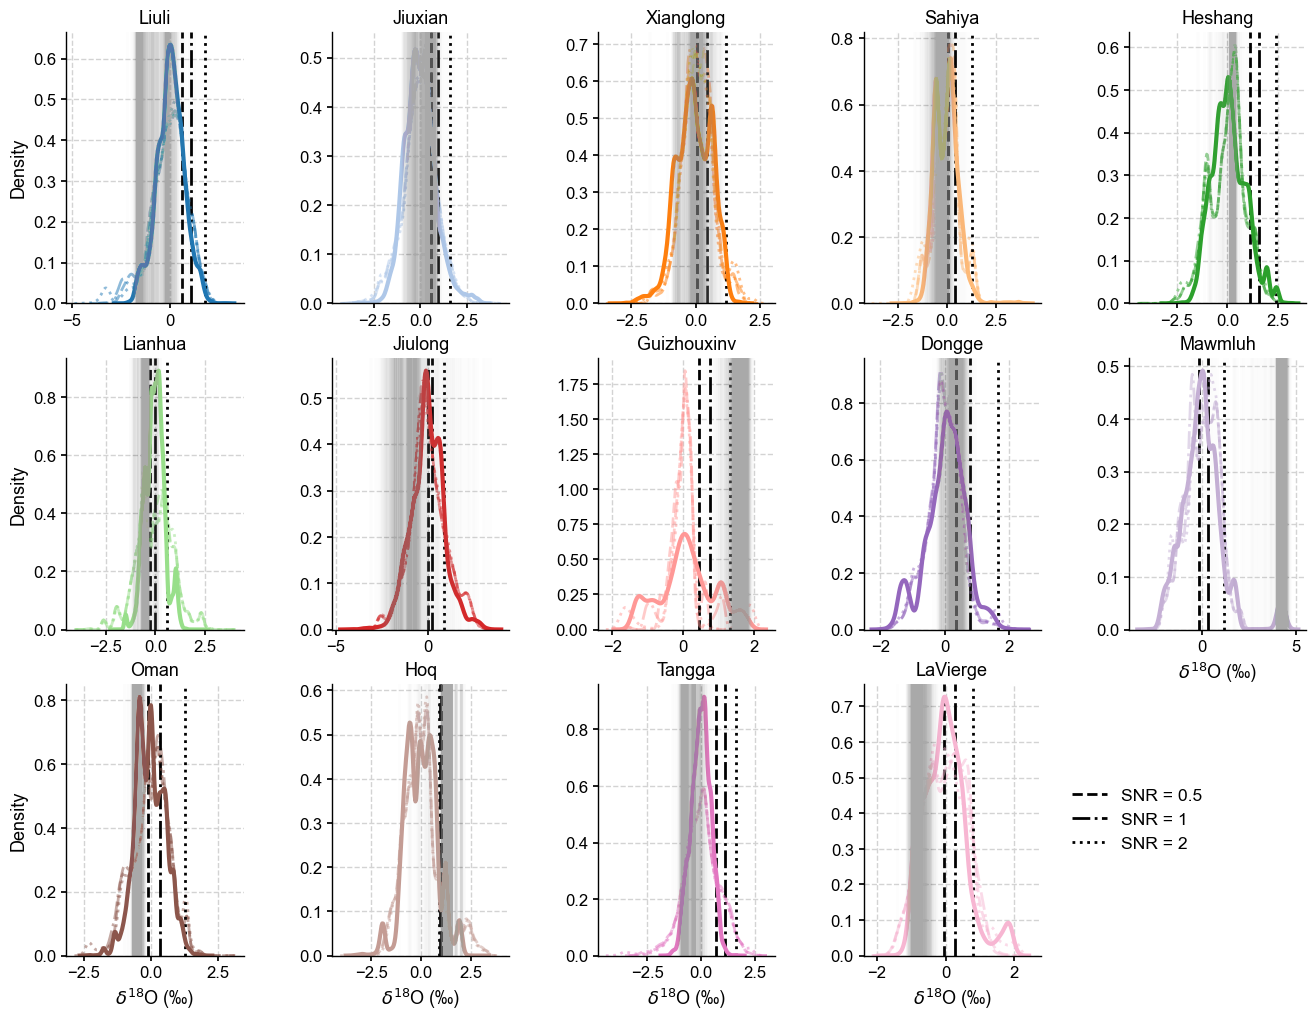

In [9]:
# Plotting

# Set color palette based on the number of keys in holo_chrons
clrs = sns.color_palette(palette='tab20', n_colors=len(holo_chrons.keys()) + 1)
clrs[14] = '#FFD700' # Make the last color gold
linestyles= ['dashed','dashdot','dotted']

# Create a figure with 5 columns and 3 rows of subplots
# fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(16, 12), tight_layout=True)
# fig.subplots_adjust(hspace=1, wspace=-.1)

# Flatten the 2D array of axes into a 1D array
# axes = ax.ravel()

fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 5, hspace=0.2, wspace=0.5)

int_size = 200
# Iterate over each site in holo_chrons
for idx, site in enumerate(holo_chrons.keys()):
    ax = plt.subplot(gs[idx])
    # Create a pandas Series from the flattened d18O_int for the current site and interval size
    s = pd.Series(d18O_diff[site][int_size].flatten())

    for idy,sn in enumerate([0.5,1,2]):
        syn = pd.Series(sn_diff[sn][site][int_size].flatten())
        sns.kdeplot(syn.dropna(), color=clrs[idx], ax=ax,linewidth=2,linestyle=linestyles[idy],common_norm=True,alpha=.5)
        median = np.nanmedian(sn_interval[sn][site])
        ax.axvline(x=median, alpha=1, color='black', linewidth=2, linestyle=linestyles[idy])

    # Plot a histogram with KDE for the current site
    sns.kdeplot(s.dropna(), color=clrs[idx], ax=ax,linewidth=3)

    # Set the title of the subplot
    ax.set_title(site, fontsize=13)

    # Set the y-label for specific subplots
    if idx in [0, 5, 10]:
        ax.set_ylabel('Density', fontsize=13)
    else:
        ax.set_ylabel('')

    # Set the tick label size for both axes
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Set the x-label for the bottom row of subplots
    if idx >= 9:
        ax.set_xlabel(u'$\delta^{18}$O (\u2030)', fontsize=13)

    if idx == 13:
        # Create legend handles
        handle1 = Line2D([],[],color='black', linestyle='dashed', label='SNR = 0.5')
        handle2 = Line2D([],[],color='black', linestyle='dashdot', label='SNR = 1')
        handle3 = Line2D([],[],color='black', linestyle='dotted', label='SNR = 2')

        # Place the handles in a list
        legend_handles = [handle1, handle2, handle3]
        # Use the handles to create a legend
        ax.legend(handles=legend_handles,loc='right', bbox_to_anchor=(2,.5))

    # Iterate over each column in d18O_int for the current site and interval size
    for i in range(d18O_diff[site][int_size].shape[1]):
        # Add a vertical line at the specified x-value with low opacity
        ax.axvline(x=d18O_diff[site][int_size][holo_int[int_size][1:-1] == 4000 - int_size / 2, i], alpha=0.01, color='darkgray')

# Remove the last unused subplot
# fig.delaxes(axes[-1])